# Systems of ODEs


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
%matplotlib inline

### Exercise 1. 

Consider the chemical reactions

\begin{align*}A &\rightarrow X \\ 2X + Y &\rightarrow 3X \\ B + X &\rightarrow Y + D \\ X &\rightarrow E \end{align*}

If the concentrations of chemicals $A$ and $B$ are essentially constant we can write a system differential equations to model this system
\begin{align*} \frac{dx}{dt} &= a + x^2y - bx - x \\
 \frac{dy}{dt} &= bx - x^2y
\end{align*}
where $a,b,x,y$ are concentrations of chemicals $A,B,X,Y$ respectively.

Let $a=1$ and $b=4$. Let $x(0) = 1$ and $y(0) = 4$. 

- Solve the system using solve_ivp.
- In one figure, plot $x$ and $y$ versus time together. 
- In another figure, plot $x$ versus $y$ in a phase plane.
- Explain your results using a text cell.

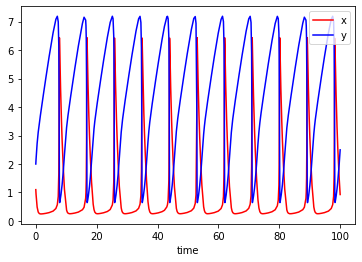

In [12]:
a = 1.
b = 4.
def bruss(t,v):
    x,y = v[0],v[1]
    dxdt = a + x**2*y - b*x - x
    dydt = b*x - x**2*y
    return(np.array([dxdt,dydt]))

ts = np.linspace(0,30,301)

#sol = solve_ivp(bruss,[0, 100.],[1.1,2.],t_eval=ts); #solve at specific times ts
sol = solve_ivp(bruss,[0, 100.],[1.1,2.],dense_output=True);

plt.plot(sol.t,sol.y[0],'r',sol.t,sol.y[1],'b');
plt.xlabel('time');
plt.legend(['x','y']);

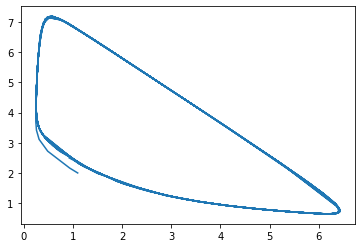

In [7]:
plt.plot(sol.y[0],sol.y[1])

In [18]:
sol.sol(3)

array([0.26278791, 4.80385861])

In [22]:
def func(t):
    return(sol.sol(t)[1]-6.)  #make a function that represents y(t) - 6 = 0

root = fsolve(func,4)  #use fsolve to find a root of function above or where y(t) = 6
print(root) #print it

[4.72321919]


### Exercise 2.

Consider a mass $m$ hanging from a ceiling by a spring with stiffness $k$ and damping $b$. Gravity acts in the positive $y$ direction. Initially the mass is at rest and the spring is unstretched.

- Draw a picture of the situation.
- Write a differential equation for the motion of the mass. What is the initial condition?
- What labels can you apply to the DE?
- Solve analytically if possible.
- Rewrite this as a system of first order DE.
- Use solve_ivp to numerically approximate the solution. 
- Plot this approximation and the exact solution on one figure.

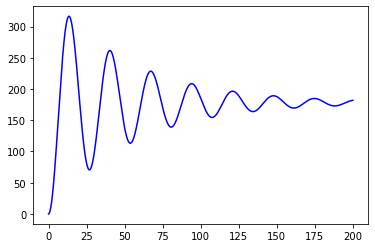

In [25]:
def springsys(t,v):
    g= 9.8
    m= 20.
    k = 1.1
    b = 0.75
    y,z = v[0],v[1]
    dydt = z
    dzdt = -(k/m)*y - (b/m)*z + g
    return(np.array([dydt,dzdt]))

ts = np.linspace(0,200,2001)
sol = solve_ivp(springsys,[0,200],[0.,0.],t_eval=ts)

plt.plot(sol.t,sol.y[0],'b');

### Exercise 3. System of linear ODEs example


<div>
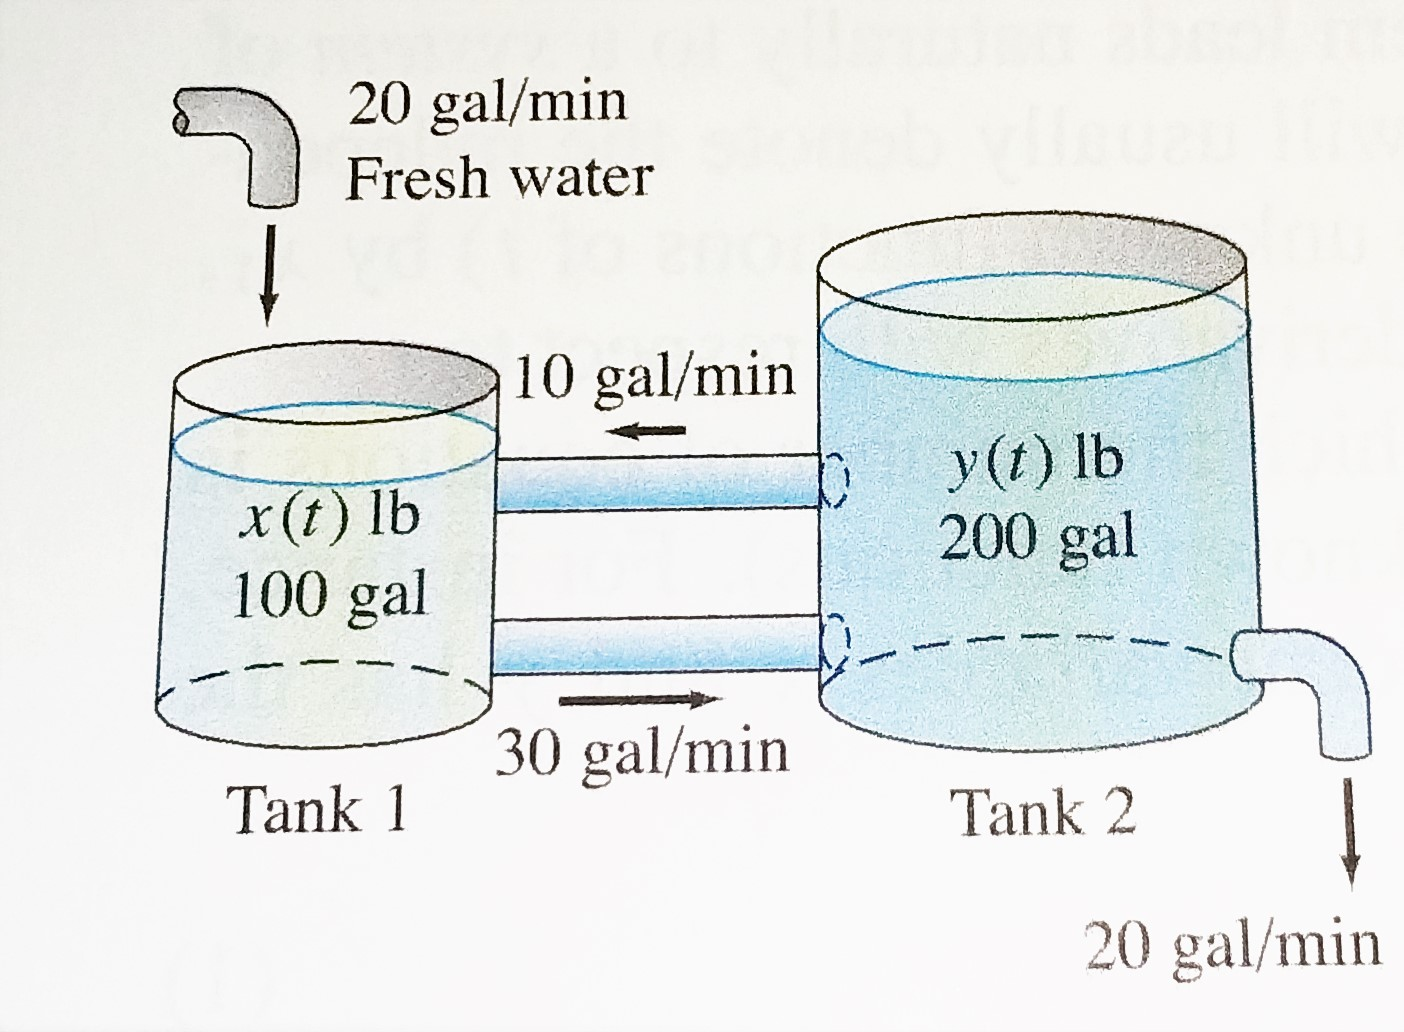
</div>    

- Set up a system of differential equations that represent the amount of salt in the tanks below.
- Use the eig command to help you determine the analytical solution. (You have already done this a couple weeks ago.)
- Set up a function that give the RHS of the system and implement a numerical solution using solve_ivp.
- Plot the exact and approximate solutions for the amount of salt in the second tank in one figure.


